# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

<span style='color:green'> SAT and ACT both provide a means to gauge college readiness of a student. This analysis will try to use the yearly (2017 & 2018) mean ACT and SAT results to provide a introductory analysis for future and further exploration direction on these two test. These include the trend of participation vs its results, and the correlation between ACT and SAT Test.

</span>

Ref: [ACT vs. SAT: How to Decide Which Test to Take](https://www.usnews.com/education/best-colleges/articles/act-vs-sat-how-to-decide-which-test-to-take) 

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

<span style='color:green'> **IMPORT All relevant library** </span>

In [1]:
#Imports:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from scipy import stats

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
act17 = pd.read_csv('../data/act_2017.csv')
sat17 = pd.read_csv('../data/sat_2017.csv')

#### 2. Display Data <br> 
Print the first 10 rows of each dataframe to your jupyter notebook </br>

<span style='color:green'> **ACT 2017 first 10 rows** </span>

In [3]:
act17.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


<span style='color:green'> **SAT 2017 first 10 rows** </span>

In [4]:
sat17.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

<span style='color:green'>**Answer:** </span> <br/>
<span style='color:green'>- ACT contains state, participation rate, English, Math, Reading,Science and composite data <br/>- SAT contains state, participation rate, Evidence-Based Reading & Writing,	Math and Total data
</span>

In [5]:
print(act17.info())
print(sat17.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     object 
dtypes: float64(4), object(3)
memory usage: 3.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math              

#### 4a. Does the data look complete? 

<span style='color:green'> **Answer:** <br/> It contains the basic information for both ACT and SAT, although prelinary observation we might need more information to perform a more complete analysis</span>

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

<span style='color:green'> **Answer:** </span> <br/>

<span style='color:green'> **ACT** </span> <br/>
- <span style='color:green'> ACT max score for each test/subtest is 32 marks </span>

<span style='color:green'> **SAT** </span> <br/>
- <span style='color:green'> SAT max score for each test/subtest is 800 marks </span>
- <span style='color:green'> SAT Total score is 1600 marks </span>

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

In [6]:
act17_web = pd.read_csv('../data/act_2017_web.csv')
sat17_web = pd.read_csv('../data/sat_2017_web.csv')

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

<span style='color:green'> **Answer:** </span> <br/>

- <span style='color:green'> Comparing the given file and downloaded file, 2017 ACT dataframe index 51 row 'state - Wyoming' field column Composite value is 20.2x. This should be a float and should not contain any string.</span>
- <span style='color:green'> 2017 ACT Column "Participation" is an object type, containing % as part of the string. The % should be removed, and the entire column be converted into float.</span>
- <span style='color:green'> As for the rest, no special issue is being observed.</span>

#### 5. What are your data types? 
Display the data types of each feature. 

In [7]:
print(act17.info())
print(sat17.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     object 
dtypes: float64(4), object(3)
memory usage: 3.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math              

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

<span style='color:green'> **Answer:** </span> <br/>

- <span style='color:green'> The only column in both dataframe should remains as 'object' or string is column "state'. The rest rest of column should be converted into float. </span>

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

<span style='color:green'>**ACT - Cleaning data**</span><br/>
- <span style='color:green'>ACT17 Column "Composite" - Remove 20.2x and converting the column to float </span>
- <span style='color:green'>ACT17 Column "Participation" - Remove x and converting the column to float </span>

<span style='color:green'>***Fix any individual values preventing other columns from being the appropriate type***</span>

In [8]:
act17['Composite'] = act17['Composite'].map(lambda x : float(x.replace('x','')))
act17['Participation'] = act17['Participation'].map(lambda x : float(x.replace('%','')))

<span style='color:green'>***Data modifications by making sure the columns are now typed appropriately.***</span><br/>

In [9]:
act17_web['Participation'] = act17_web['Participation'].map(lambda x : float(x)/100)

In [10]:
act17.loc[51,'Composite']

20.2

<span style='color:green'>***Display the data types again to confirm they are correct.***</span><br/>

In [11]:
act17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     float64
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     float64
dtypes: float64(6), object(1)
memory usage: 3.0+ KB


<span style='color:green'>**SAT - Cleaning data**</span><br/>

In [12]:
sat17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [13]:
sat17['Participation'] = sat17['Participation'].map(lambda x : float(x.replace('%','')))
sat17['Evidence-Based Reading and Writing'] = sat17['Evidence-Based Reading and Writing'].astype('float')
sat17['Math'] = sat17['Math'].astype('float')
sat17['Total'] = sat17['Total'].astype('float')

In [14]:
sat17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   State                               51 non-null     object 
 1   Participation                       51 non-null     float64
 2   Evidence-Based Reading and Writing  51 non-null     float64
 3   Math                                51 non-null     float64
 4   Total                               51 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

### <span style='color:green'> Code - Rename Columns </span>

In [15]:
act17.head(0)

,State,Participation,English,Math,Reading,Science,Composite


In [16]:
act17_rn = act17.rename(columns={
    'State':'state', 
    'Participation':'act_part',
    'English':'act_english',
    'Math':'act_math',
    'Reading':'act_reading',
    'Science':'act_science',
    'Composite':'act_composite'
})
act17_rn.head(1)

,state,act_part,act_english,act_math,act_reading,act_science,act_composite
0,National,60.0,20.3,20.7,21.4,21.0,21.0


In [17]:
act17_rn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   state          52 non-null     object 
 1   act_part       52 non-null     float64
 2   act_english    52 non-null     float64
 3   act_math       52 non-null     float64
 4   act_reading    52 non-null     float64
 5   act_science    52 non-null     float64
 6   act_composite  52 non-null     float64
dtypes: float64(6), object(1)
memory usage: 3.0+ KB


In [18]:
act17_rn.to_csv('act17_rn.csv')

In [19]:
sat17.head(0)

,State,Participation,Evidence-Based Reading and Writing,Math,Total


In [20]:
sat17_rn = sat17.rename(columns={
    'State':'state', 
    'Participation':'sat_part',
    'Evidence-Based Reading and Writing':'sat_ebrw',
    'Math':'sat_math',
    'Total':'sat_total'
})
sat17_rn.head(1)

,state,sat_part,sat_ebrw,sat_math,sat_total
0,Alabama,5.0,593.0,572.0,1165.0


In [21]:
sat17_rn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   state      51 non-null     object 
 1   sat_part   51 non-null     float64
 2   sat_ebrw   51 non-null     float64
 3   sat_math   51 non-null     float64
 4   sat_total  51 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [22]:
sat17_rn.to_csv('sat17_rn.csv')

#### 8. Data dictionary

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. 

Data Dictionary Entry:

|Variable|Type|Dataset|Description|
|---|---|---|---|
|**act17**|*dataframe*|ACT 2017 Results|Contain Means of 51 State ACT scores.| 
|**sat17**|*dataframe*|SAT 2017 Results|Contain Means of 51 State SAT scores.| 
|**final**|*dataframe*|Data from GA |2017 & 2018 ACT & SAT combined horizontally, with column name + _yr.|
|**final_v**|*dataframe*|Data from GA |2017 & 2018 ACT & SAT vertically horizontally.|
|**combined17**|*CSV file*|Data from GA |2017 ACT & SAT participation rate and its relevants scores.|
|**combined18**|*CSV file*|Data from GA |2018 ACT & SAT participation rate and its relevants scores.|
|**final**|*CSV file*|Data from GA |2017 & 2018 ACT & SAT combined horizontally.|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

#### 9. Drop unnecessary rows

<span style='color:green'>- Additional row of 'state' - ***national*** being identify in ACT17 dataframe, 
this row will need to be removed accordingly. <br> </span>

#### <span style='color:green'> Code - Drop unnecessary row in ACT17 </span>

In [23]:
act17_rn.drop(0, inplace=True)

In [24]:
act17_rn.head()

,state,act_part,act_english,act_math,act_reading,act_science,act_composite
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4
5,California,31.0,22.5,22.7,23.1,22.2,22.8


#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the **state** in each dataframe as the **key**. Assign this to a new variable.

#### <span style='color:green'> Code - 10. Merge Dataframes </span>

In [25]:
act17_rn.set_index('state',inplace=True)
sat17_rn.set_index('state',inplace=True)

In [26]:
act17_rn.head(1)

,act_part,act_english,act_math,act_reading,act_science,act_composite
state,,,,,,
Alabama,100.0,18.9,18.4,19.7,19.4,19.2


In [27]:
sat17_rn.head(1)

,sat_part,sat_ebrw,sat_math,sat_total
state,,,,
Alabama,5.0,593.0,572.0,1165.0


In [28]:
combined17 = act17_rn.merge(sat17_rn, how = 'left',left_index = True, right_index=True)

In [29]:
combined17

,act_part,act_english,act_math,act_reading,act_science,act_composite,sat_part,sat_ebrw,sat_math,sat_total
state,,,,,,,,,,
Alabama,100.0,18.9,18.4,19.7,19.4,19.2,5.0,593.0,572.0,1165.0
Alaska,65.0,18.7,19.8,20.4,19.9,19.8,38.0,547.0,533.0,1080.0
Arizona,62.0,18.6,19.8,20.1,19.8,19.7,30.0,563.0,553.0,1116.0
Arkansas,100.0,18.9,19.0,19.7,19.5,19.4,3.0,614.0,594.0,1208.0
California,31.0,22.5,22.7,23.1,22.2,22.8,53.0,531.0,524.0,1055.0
Colorado,100.0,20.1,20.3,21.2,20.9,20.8,11.0,606.0,595.0,1201.0
Connecticut,31.0,25.5,24.6,25.6,24.6,25.2,100.0,530.0,512.0,1041.0
Delaware,18.0,24.1,23.4,24.8,23.6,24.1,100.0,503.0,492.0,996.0
District of Columbia,32.0,24.4,23.5,24.9,23.5,24.2,100.0,482.0,468.0,950.0


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [30]:
combined17.to_csv('../data/combined_2017.csv')

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [31]:
# import data for 2018
act18 = pd.read_csv('../data/act_2018_updated.csv')
sat18 = pd.read_csv('../data/sat_2018.csv')

In [32]:
act18.head(1)

,State,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
0,Alabama,100,19.1,18.9,18.3,19.6,19.0


In [33]:
act18_rn = act18.rename(columns={
    'State':'state', 
    'Percentage of Students Tested':'act_part',
    'Average English Score':'act_english',
    'Average Math Score':'act_math',
    'Average Reading Score':'act_reading',
    'Average Science Score':'act_science',
    'Average Composite Score':'act_composite'
})
act18_rn.head(1)

,state,act_part,act_composite,act_english,act_math,act_reading,act_science
0,Alabama,100,19.1,18.9,18.3,19.6,19.0


In [34]:
act18_rn.head(1)

,state,act_part,act_composite,act_english,act_math,act_reading,act_science
0,Alabama,100,19.1,18.9,18.3,19.6,19.0


In [35]:
sat18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [36]:
sat18_rn = sat18.rename(columns={
    'State':'state', 
    'Participation':'sat_part',
    'Evidence-Based Reading and Writing':'sat_ebrw',
    'Math':'sat_math',
    'Total':'sat_total'
})
sat18_rn.head(1)

,state,sat_part,sat_ebrw,sat_math,sat_total
0,Alabama,6%,595,571,1166


In [37]:
sat18_rn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   state      51 non-null     object
 1   sat_part   51 non-null     object
 2   sat_ebrw   51 non-null     int64 
 3   sat_math   51 non-null     int64 
 4   sat_total  51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [38]:
sat18_rn['sat_part'] = sat18_rn['sat_part'].map(lambda x : float(x.replace('%','')))
sat18_rn['sat_ebrw'] = sat18_rn['sat_ebrw'].astype('float')
sat18_rn['sat_math'] = sat18_rn['sat_math'].astype('float')
sat18_rn['sat_total'] = sat18_rn['sat_total'].astype('float')

In [39]:
sat18_rn.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   state      51 non-null     object 
 1   sat_part   51 non-null     float64
 2   sat_ebrw   51 non-null     float64
 3   sat_math   51 non-null     float64
 4   sat_total  51 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [40]:
act18.head(3)

,State,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
0,Alabama,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,33,20.8,19.8,20.6,21.6,20.7
2,Arizona,66,19.2,18.2,19.4,19.5,19.2


In [41]:
act18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          51 non-null     object 
 1   Percentage of Students Tested  51 non-null     int64  
 2   Average Composite Score        51 non-null     float64
 3   Average English Score          51 non-null     float64
 4   Average Math Score             51 non-null     float64
 5   Average Reading Score          51 non-null     float64
 6   Average Science Score          51 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.9+ KB


In [42]:
act18_rn.set_index('state',inplace=True)
sat18_rn.set_index('state',inplace=True)

In [43]:
combined18 = act18_rn.merge(sat18_rn, how = 'left',left_index = True, right_index=True)

In [44]:
combined18

,act_part,act_composite,act_english,act_math,act_reading,act_science,sat_part,sat_ebrw,sat_math,sat_total
state,,,,,,,,,,
Alabama,100,19.1,18.9,18.3,19.6,19.0,6.0,595.0,571.0,1166.0
Alaska,33,20.8,19.8,20.6,21.6,20.7,43.0,562.0,544.0,1106.0
Arizona,66,19.2,18.2,19.4,19.5,19.2,29.0,577.0,572.0,1149.0
Arkansas,100,19.4,19.1,18.9,19.7,19.4,5.0,592.0,576.0,1169.0
California,27,22.7,22.5,22.5,23.0,22.1,60.0,540.0,536.0,1076.0
Colorado,30,23.9,23.9,23.2,24.4,23.5,100.0,519.0,506.0,1025.0
Connecticut,26,25.6,26.0,24.8,26.1,24.9,100.0,535.0,519.0,1053.0
Delaware,17,23.2,23.7,23.1,24.5,23.4,100.0,505.0,492.0,998.0
District of Columbia,32,23.6,23.7,22.7,24.4,23.0,92.0,497.0,480.0,977.0


In [45]:
combined18.to_csv('../data/combined_2018.csv')

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [46]:
final = combined17.merge(combined18, how = 'left',left_index = True, right_index=True, suffixes=('_17','_18'))

In [47]:
final.to_csv('../data/final.csv')
final

,act_part_17,act_english_17,act_math_17,act_reading_17,act_science_17,act_composite_17,sat_part_17,sat_ebrw_17,sat_math_17,sat_total_17,act_part_18,act_composite_18,act_english_18,act_math_18,act_reading_18,act_science_18,sat_part_18,sat_ebrw_18,sat_math_18,sat_total_18
state,,,,,,,,,,,,,,,,,,,,
Alabama,100.0,18.9,18.4,19.7,19.4,19.2,5.0,593.0,572.0,1165.0,100,19.1,18.9,18.3,19.6,19.0,6.0,595.0,571.0,1166.0
Alaska,65.0,18.7,19.8,20.4,19.9,19.8,38.0,547.0,533.0,1080.0,33,20.8,19.8,20.6,21.6,20.7,43.0,562.0,544.0,1106.0
Arizona,62.0,18.6,19.8,20.1,19.8,19.7,30.0,563.0,553.0,1116.0,66,19.2,18.2,19.4,19.5,19.2,29.0,577.0,572.0,1149.0
Arkansas,100.0,18.9,19.0,19.7,19.5,19.4,3.0,614.0,594.0,1208.0,100,19.4,19.1,18.9,19.7,19.4,5.0,592.0,576.0,1169.0
California,31.0,22.5,22.7,23.1,22.2,22.8,53.0,531.0,524.0,1055.0,27,22.7,22.5,22.5,23.0,22.1,60.0,540.0,536.0,1076.0
Colorado,100.0,20.1,20.3,21.2,20.9,20.8,11.0,606.0,595.0,1201.0,30,23.9,23.9,23.2,24.4,23.5,100.0,519.0,506.0,1025.0
Connecticut,31.0,25.5,24.6,25.6,24.6,25.2,100.0,530.0,512.0,1041.0,26,25.6,26.0,24.8,26.1,24.9,100.0,535.0,519.0,1053.0
Delaware,18.0,24.1,23.4,24.8,23.6,24.1,100.0,503.0,492.0,996.0,17,23.2,23.7,23.1,24.5,23.4,100.0,505.0,492.0,998.0
District of Columbia,32.0,24.4,23.5,24.9,23.5,24.2,100.0,482.0,468.0,950.0,32,23.6,23.7,22.7,24.4,23.0,92.0,497.0,480.0,977.0


In [48]:
final_v = pd.concat(objs = [combined17, combined18])
final_v.head(60)

,act_part,act_english,act_math,act_reading,act_science,act_composite,sat_part,sat_ebrw,sat_math,sat_total
state,,,,,,,,,,
Alabama,100.0,18.9,18.4,19.7,19.4,19.2,5.0,593.0,572.0,1165.0
Alaska,65.0,18.7,19.8,20.4,19.9,19.8,38.0,547.0,533.0,1080.0
Arizona,62.0,18.6,19.8,20.1,19.8,19.7,30.0,563.0,553.0,1116.0
Arkansas,100.0,18.9,19.0,19.7,19.5,19.4,3.0,614.0,594.0,1208.0
California,31.0,22.5,22.7,23.1,22.2,22.8,53.0,531.0,524.0,1055.0
Colorado,100.0,20.1,20.3,21.2,20.9,20.8,11.0,606.0,595.0,1201.0
Connecticut,31.0,25.5,24.6,25.6,24.6,25.2,100.0,530.0,512.0,1041.0
Delaware,18.0,24.1,23.4,24.8,23.6,24.1,100.0,503.0,492.0,996.0
District of Columbia,32.0,24.4,23.5,24.9,23.5,24.2,100.0,482.0,468.0,950.0


In [49]:
final_v.to_csv('../data/final_v.csv')

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [50]:
round(final.describe(),2)

,act_part_17,act_english_17,act_math_17,act_reading_17,act_science_17,act_composite_17,sat_part_17,sat_ebrw_17,sat_math_17,sat_total_17,act_part_18,act_composite_18,act_english_18,act_math_18,act_reading_18,act_science_18,sat_part_18,sat_ebrw_18,sat_math_18,sat_total_18
count,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00
mean,65.25,20.93,21.18,22.01,21.04,21.52,39.80,569.12,547.63,1126.10,61.65,21.49,20.99,21.13,22.02,21.35,45.75,563.69,556.24,1120.02
std,32.14,2.35,1.98,2.07,3.18,2.02,35.28,45.67,84.91,92.49,34.08,2.11,2.45,2.04,2.17,1.87,37.31,47.50,47.77,94.16
min,8.00,16.30,18.00,18.10,2.30,17.80,2.00,482.00,52.00,950.00,7.00,17.70,16.60,17.80,18.00,17.90,2.00,480.00,480.00,977.00
25%,31.00,19.00,19.40,20.45,19.90,19.80,4.00,533.50,522.00,1055.50,28.50,19.95,19.10,19.40,20.45,19.85,4.50,534.50,522.50,1057.50
50%,69.00,20.70,20.90,21.80,21.30,21.40,38.00,559.00,548.00,1107.00,66.00,21.30,20.20,20.70,21.60,21.10,52.00,552.00,544.00,1098.00
75%,100.00,23.30,23.10,24.15,22.75,23.60,66.00,613.00,599.00,1212.00,100.00,23.55,23.70,23.15,24.10,23.05,77.50,610.50,593.50,1204.00
max,100.00,25.50,25.30,26.00,24.90,25.50,100.00,644.00,651.00,1295.00,100.00,25.60,26.00,25.20,26.10,24.90,100.00,643.00,655.00,1298.00


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [51]:
act17_rn['act_math'].sum()

1080.3

In [52]:
def MStd_dev(data):
    result = math.sqrt((sum((data-data.mean())**2))/len(data))
    return result

In [53]:
TList = act17_rn['act_english']
MStd_dev(TList)

2.3304876369363363

In [54]:
np.std(TList)

2.3304876369363363

In [55]:
columns_name = act17_rn.keys()
columns_name

Index(['act_part', 'act_english', 'act_math', 'act_reading', 'act_science',
       'act_composite'],
      dtype='object')

In [56]:
Lists = [act17_rn[col] for col in columns_name]
type(Lists)

list

In [57]:
List_Std = [round(MStd_dev(List),2) for List in Lists]
List_Std

[31.82, 2.33, 1.96, 2.05, 3.15, 2.0]

In [58]:
List_Std2 = [round(np.std(List),2) for List in Lists]
List_Std2 

[31.82, 2.33, 1.96, 2.05, 3.15, 2.0]

In [59]:
act17_rn[columns_name].describe()

,act_part,act_english,act_math,act_reading,act_science,act_composite
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,65.254902,20.931373,21.182353,22.013725,21.041176,21.519608
std,32.140842,2.353677,1.981989,2.067271,3.182463,2.020695
min,8.000000,16.300000,18.000000,18.100000,2.300000,17.800000
25%,31.000000,19.000000,19.400000,20.450000,19.900000,19.800000
50%,69.000000,20.700000,20.900000,21.800000,21.300000,21.400000
75%,100.000000,23.300000,23.100000,24.150000,22.750000,23.600000
max,100.000000,25.500000,25.300000,26.000000,24.900000,25.500000


- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [60]:
std_dict = {col: std for col,std in zip(columns_name, List_Std)}
std_dict

{'act_part': 31.82,
 'act_english': 2.33,
 'act_math': 1.96,
 'act_reading': 2.05,
 'act_science': 3.15,
 'act_composite': 2.0}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

<span style='color:green'> **Answer**</span>

<span style='color:green'> From the above, the calculated std and numpy's std is different from the pandas describe. This is mainly Pandas uses the unbiased estimator (N-1 in the denominator), whereas Numpy by default does not. </span>


#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [61]:
Final_Transpose = final.transpose()
round(Final_Transpose.describe(),2)

state,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
count,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,...,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00
mean,253.18,237.66,245.52,257.70,232.96,245.76,234.99,222.94,217.40,235.38,...,264.56,266.21,226.18,245.28,244.04,243.09,235.86,227.44,279.00,269.07
std,385.08,360.40,373.93,392.93,350.49,366.90,341.41,325.44,313.45,346.33,...,406.55,406.57,336.48,373.56,367.40,364.73,354.58,343.85,427.91,411.48
min,5.00,18.70,18.20,3.00,22.10,11.00,24.60,17.00,22.70,19.00,...,3.00,5.00,19.50,3.00,23.10,23.30,20.90,14.00,3.00,3.00
25%,18.90,20.27,19.48,19.08,22.65,21.12,25.42,23.40,23.67,19.48,...,21.58,19.48,20.70,19.90,23.75,23.72,22.00,20.23,20.38,19.78
50%,19.50,27.30,24.55,19.60,25.05,24.15,26.05,24.30,28.45,38.55,...,22.25,19.90,31.05,20.70,24.65,24.65,23.35,21.25,20.70,20.60
75%,571.25,535.75,555.50,580.00,525.75,509.25,513.75,492.00,471.00,502.75,...,605.25,604.75,508.25,492.50,551.75,543.25,535.00,492.75,641.25,609.25
max,1166.00,1106.00,1149.00,1208.00,1076.00,1201.00,1053.00,998.00,977.00,1099.00,...,1240.00,1231.00,1032.00,1238.00,1120.00,1117.00,1081.00,1086.00,1294.00,1257.00


In [62]:
print("SAT2017 - The lowest Participation State is",Final_Transpose.loc['sat_part_17'].idxmin(axis=1),)
print("SAT2017 - The highest Participation State is",Final_Transpose.loc['sat_part_17'].idxmax(axis=1))
print("SAT2018 - The lowest Participation State is",Final_Transpose.loc['sat_part_18'].idxmin(axis=1))
print("SAT2018 - The highest Participation State is",Final_Transpose.loc['sat_part_18'].idxmax(axis=1))
print("ACT2017 - The lowest Participation State is",Final_Transpose.loc['act_part_17'].idxmin(axis=1))
print("ACT2017 - The highest Participation State is",Final_Transpose.loc['act_part_17'].idxmax(axis=1))
print("ACT2018 - The lowest Participation State is",Final_Transpose.loc['act_part_18'].idxmin(axis=1))
print("ACT2018 - The highest Participation State is",Final_Transpose.loc['act_part_18'].idxmax(axis=1))

SAT2017 - The lowest Participation State is Iowa
SAT2017 - The highest Participation State is Connecticut
SAT2018 - The lowest Participation State is North Dakota
SAT2018 - The highest Participation State is Colorado
ACT2017 - The lowest Participation State is Maine
ACT2017 - The highest Participation State is Alabama
ACT2018 - The lowest Participation State is Maine
ACT2018 - The highest Participation State is Alabama


In [63]:
print("SAT2017 - The lowest Total Score State is",Final_Transpose.loc['sat_total_18'].idxmin(axis=1),)
print("SAT2017 - The highest Total Score State is",Final_Transpose.loc['sat_total_17'].idxmax(axis=1))
print("SAT2018 - The lowest Total Score State is",Final_Transpose.loc['sat_total_18'].idxmin(axis=1))
print("SAT2018 - The highest Total Score State is",Final_Transpose.loc['sat_total_18'].idxmax(axis=1))
print("ACT2017 - The lowest Composite Score State is",Final_Transpose.loc['act_composite_17'].idxmin(axis=1))
print("ACT2017 - The highest Composite Score State is",Final_Transpose.loc['act_composite_17'].idxmax(axis=1))
print("ACT2018 - The lowest Composite Score State is",Final_Transpose.loc['act_composite_17'].idxmin(axis=1))
print("ACT2018 - The highest Composite Score State is",Final_Transpose.loc['act_composite_17'].idxmax(axis=1))

SAT2017 - The lowest Total Score State is District of Columbia
SAT2017 - The highest Total Score State is Minnesota
SAT2018 - The lowest Total Score State is District of Columbia
SAT2018 - The highest Total Score State is Minnesota
ACT2017 - The lowest Composite Score State is Nevada
ACT2017 - The highest Composite Score State is New Hampshire
ACT2018 - The lowest Composite Score State is Nevada
ACT2018 - The highest Composite Score State is New Hampshire


## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

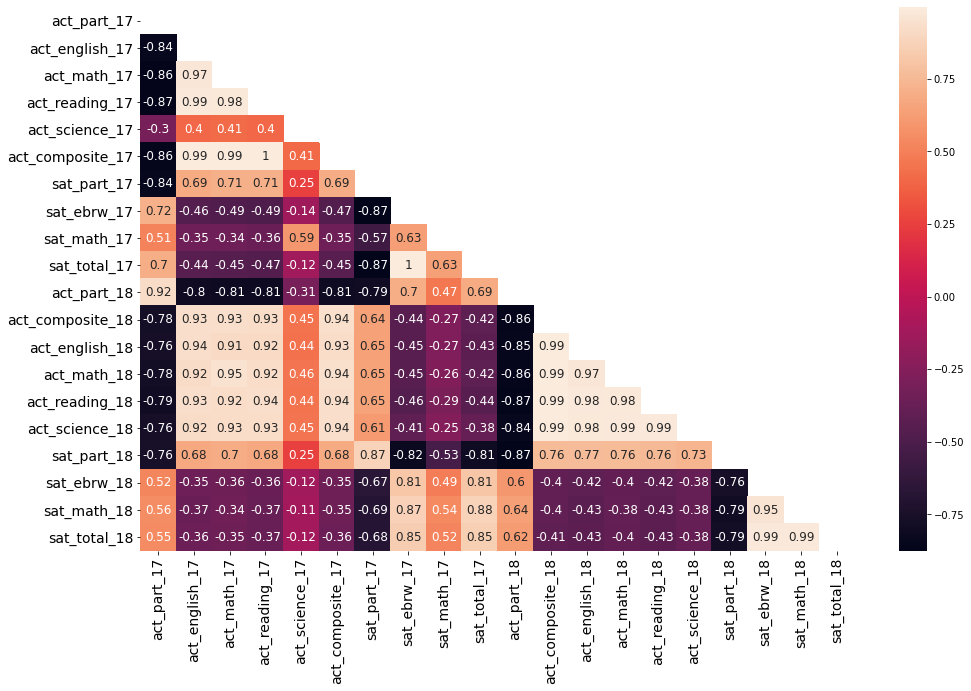

In [64]:
mask = np.zeros_like(final.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask
plt.figure(figsize=(16,10))
sns.heatmap(final.corr(),mask=mask, annot=True, annot_kws={'size': 12})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

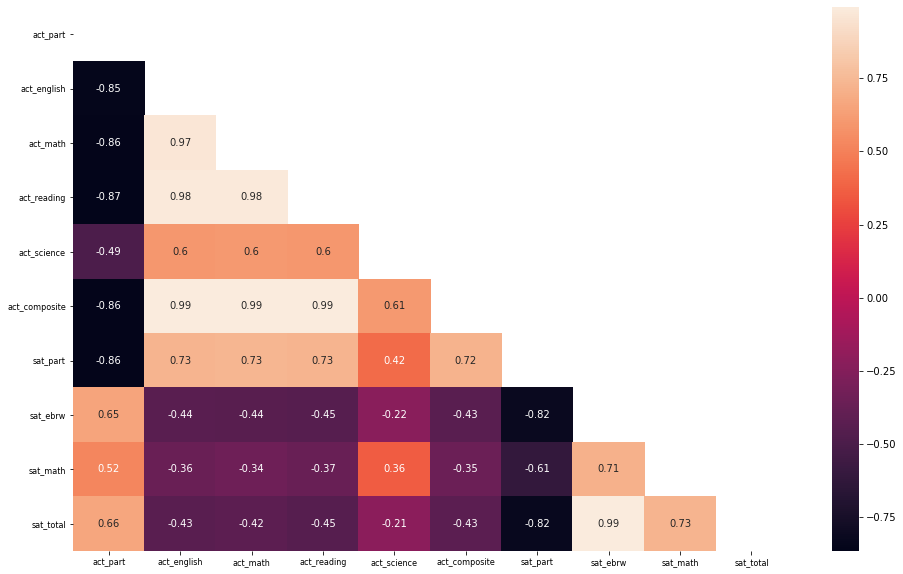

In [65]:
mask = np.zeros_like(final_v.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask
plt.figure(figsize=(16,10))
sns.heatmap(final_v.corr(),mask=mask, annot=True, annot_kws={'size': 10})
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [66]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2,figsize=(28,28)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        MR = dataframe[column].median()
        color1 = '#ff7733'
        color2 = '#9fff33'
        ax[i].hist(dataframe[column],bins=20,color="g",edgecolor="black") # feel free to add morae settings
        ax[i].set_title(list_of_titles[i])
        ax[i].set_xlabel(list_of_xlabels[i])
        ax[i].axvline(MR, linestyle='--', lw = 2, color=color1, label=MR)
        # Set titles, labels, etc here for each subplot

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

#### <span style='color:green'> Histograms - Math Score for SAT & ACT </span>

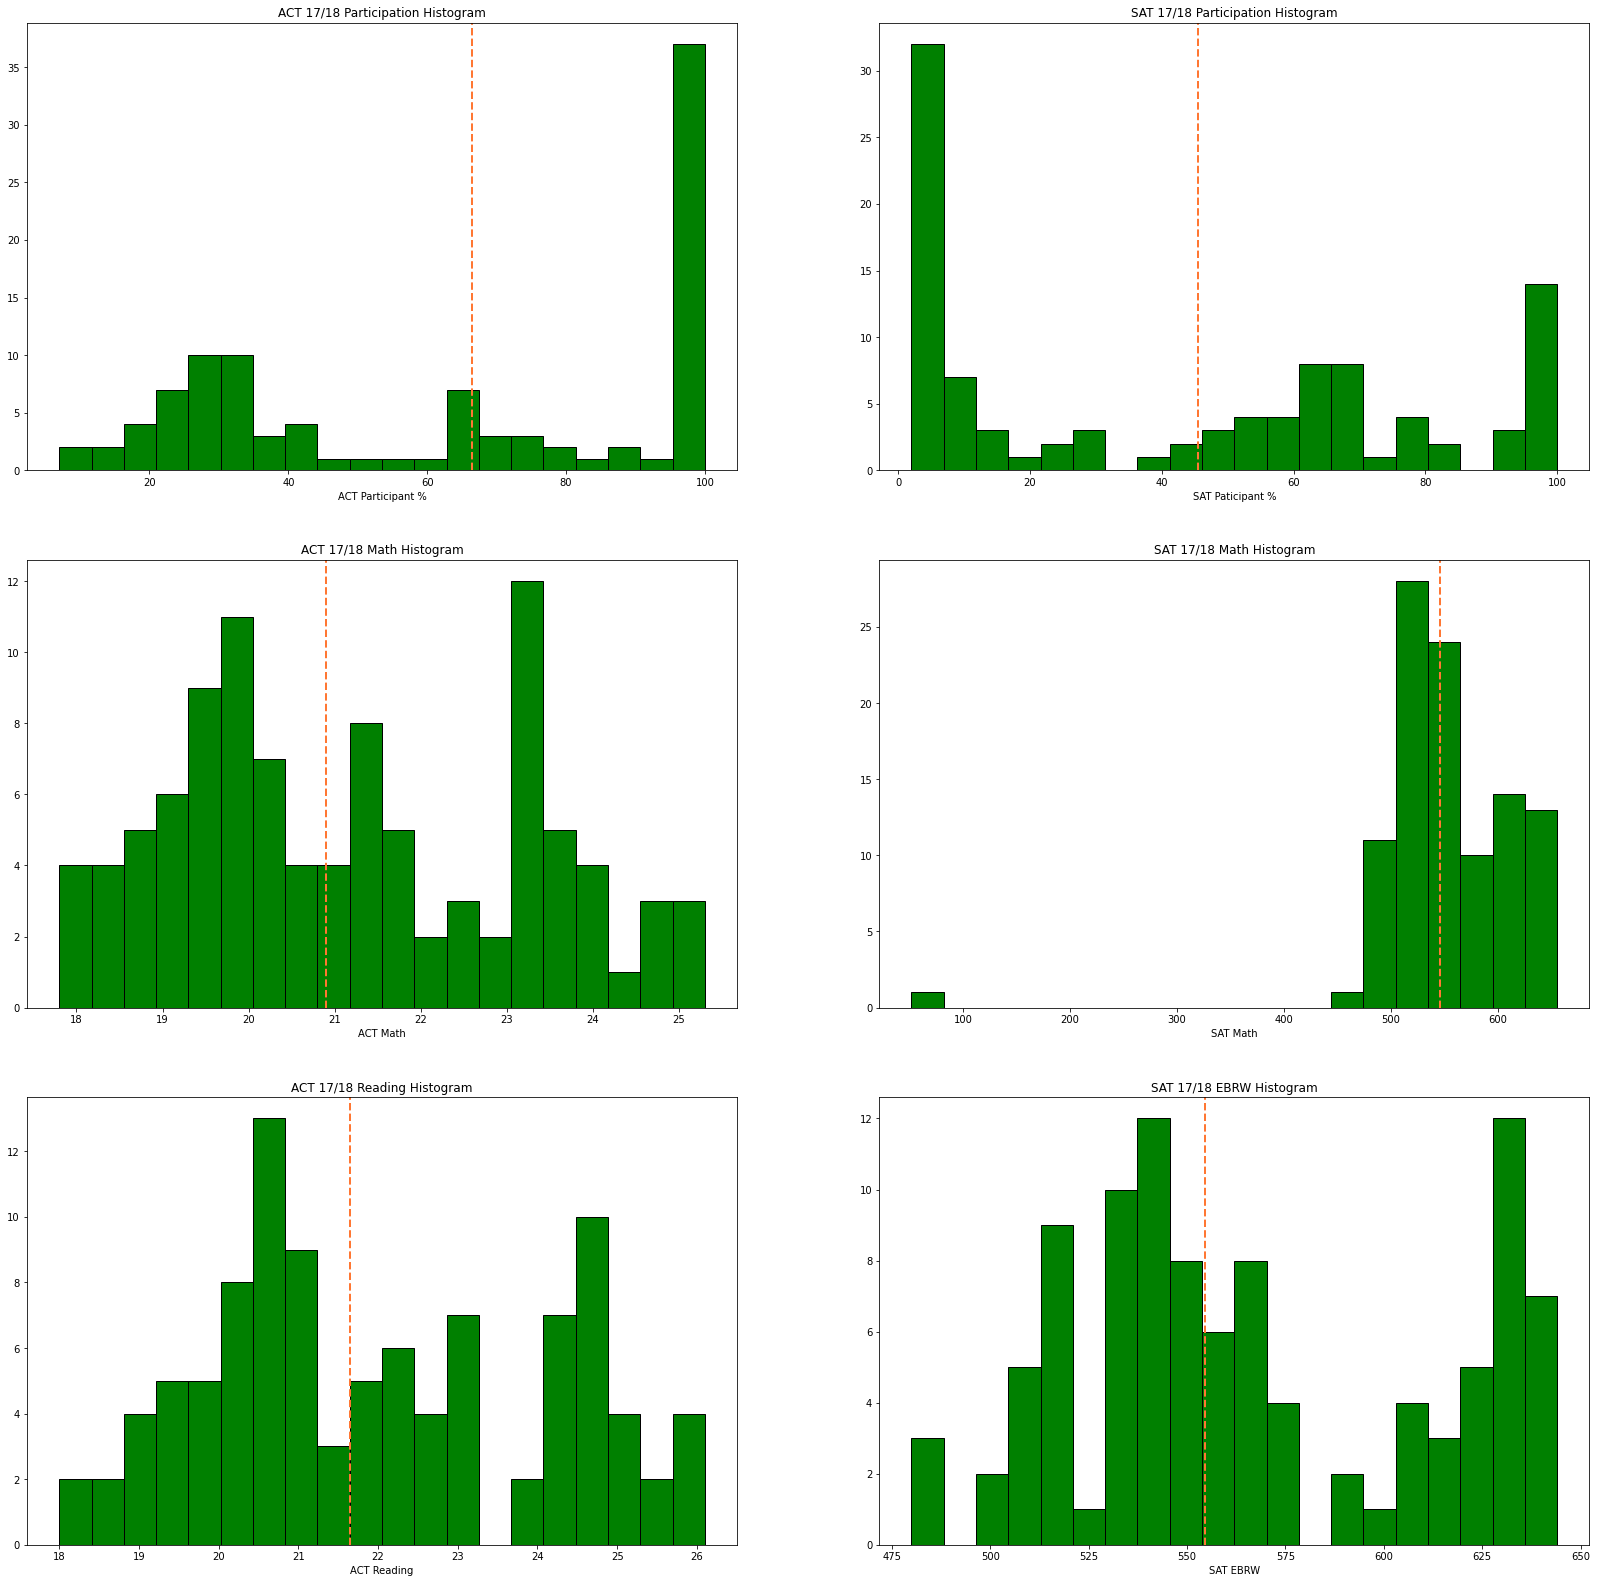

In [67]:
Titles = ['ACT 17/18 Participation Histogram','SAT 17/18 Participation Histogram',
          'ACT 17/18 Math Histogram','SAT 17/18 Math Histogram',
         'ACT 17/18 Reading Histogram','SAT 17/18 EBRW Histogram']
XLabels = ('ACT Participant %','SAT Paticipant %','ACT Math','SAT Math','ACT Reading','SAT EBRW')
subplot_histograms(final_v, ['act_part','sat_part','act_math','sat_math','act_reading','sat_ebrw'],Titles,XLabels)

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [68]:
#Defines a function to create a scatterplot between two variables
def subplot_scatterplot(df, column1, column2, xlabel,ylabel,title):
    f = plt.figure(figsize=(8,5))
    sns.set_style('whitegrid')
    # sns.scatterplot(x=final_sat_act[column1],y=final_sat_act[column2])
    sns.scatterplot(x=df[column1],y=df[column2])
    # sns.lmplot(column1,column2, data=df)
    # sns.scatterplot(column1,column2)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title);

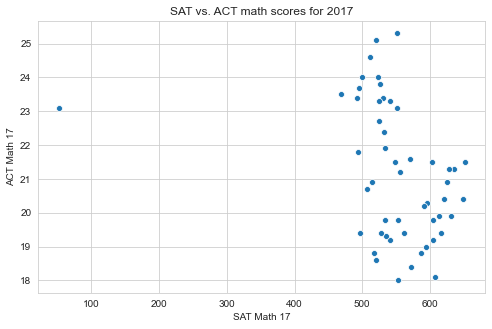

In [69]:
# SAT vs. ACT math scores for 2017
subplot_scatterplot(final, 'sat_math_17','act_math_17', 
                    'SAT Math 17', 'ACT Math 17', 
                    'SAT vs. ACT math scores for 2017')

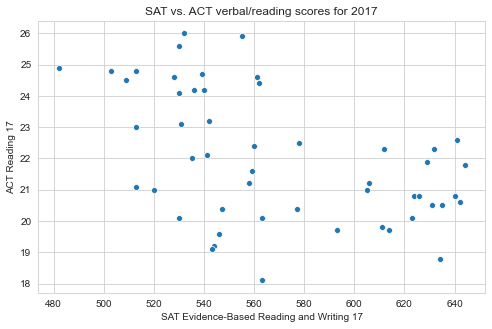

In [70]:
# SAT vs. ACT verbal/reading scores for 2017
subplot_scatterplot(final, 'sat_ebrw_17','act_reading_17', 
                    'SAT Evidence-Based Reading and Writing 17', 'ACT Reading 17', 
                    'SAT vs. ACT verbal/reading scores for 2017')

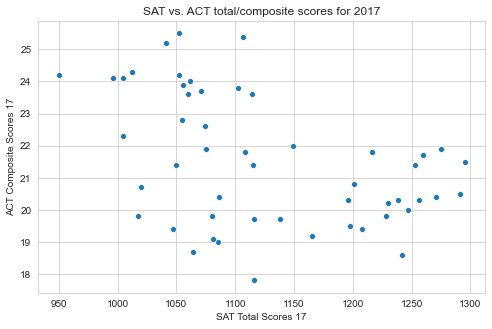

In [71]:
# SAT vs. ACT total/composite scores for 2017
subplot_scatterplot(final, 'sat_total_17','act_composite_17', 
                    'SAT Total Scores 17', 'ACT Composite Scores 17', 
                    'SAT vs. ACT total/composite scores for 2017')

In [72]:
def subplot_lmplot(df, column1, column2, xlabel,ylabel,title):
    f = plt.figure(figsize=(8,5))
    sns.set_style('whitegrid')
    sns.lmplot(column1,column2, data=df)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title);

<Figure size 576x360 with 0 Axes>

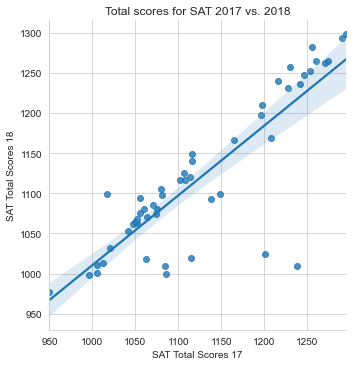

In [73]:
# Total scores for SAT 2017 vs. 2018
subplot_lmplot(final, 'sat_total_17','sat_total_18', 
                    'SAT Total Scores 17', 'SAT Total Scores 18', 
                    'Total scores for SAT 2017 vs. 2018')

<Figure size 576x360 with 0 Axes>

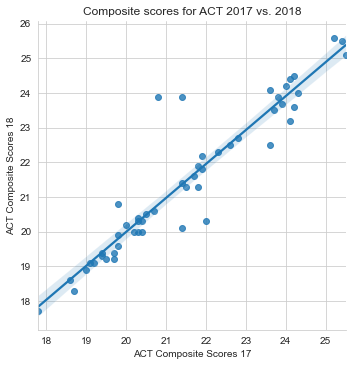

In [74]:
# Composite scores for ACT 2017 vs. 2018
subplot_lmplot(final, 'act_composite_17','act_composite_18', 
                    'ACT Composite Scores 17', 'ACT Composite Scores 18', 
                    'Composite scores for ACT 2017 vs. 2018')

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [75]:
final_v.head()

,act_part,act_english,act_math,act_reading,act_science,act_composite,sat_part,sat_ebrw,sat_math,sat_total
state,,,,,,,,,,
Alabama,100.0,18.9,18.4,19.7,19.4,19.2,5.0,593.0,572.0,1165.0
Alaska,65.0,18.7,19.8,20.4,19.9,19.8,38.0,547.0,533.0,1080.0
Arizona,62.0,18.6,19.8,20.1,19.8,19.7,30.0,563.0,553.0,1116.0
Arkansas,100.0,18.9,19.0,19.7,19.5,19.4,3.0,614.0,594.0,1208.0
California,31.0,22.5,22.7,23.1,22.2,22.8,53.0,531.0,524.0,1055.0


In [76]:
TList = list(final_v['act_english'])
DF1 = pd.DataFrame(TList, columns=['mark'])
DF1["Subject"] = "ACT_english"
TList = list(final_v['act_math'])
DF2 = pd.DataFrame(TList, columns=['mark'])
DF2["Subject"] = "ACT_math"
TList = list(final_v['act_reading'])
DF3 = pd.DataFrame(TList, columns=['mark'])
DF3["Subject"] = "ACT_reading"
TList = list(final_v['act_science'])
DF4 = pd.DataFrame(TList, columns=['mark'])
DF4["Subject"] = "ACT_science"
TList = list(final_v['act_composite'])
DF5 = pd.DataFrame(TList, columns=['mark'])
DF5["Subject"] = "ACT_composite"
Marks_ACT = pd.concat(objs = [DF1,DF2,DF3,DF4,DF5])
Marks_ACT

,mark,Subject
0,18.9,ACT_english
1,18.7,ACT_english
2,18.6,ACT_english
3,18.9,ACT_english
4,22.5,ACT_english
...,...,...
97,23.9,ACT_composite
98,22.2,ACT_composite
99,20.3,ACT_composite
100,20.5,ACT_composite


In [77]:
final_v.head(2)

,act_part,act_english,act_math,act_reading,act_science,act_composite,sat_part,sat_ebrw,sat_math,sat_total
state,,,,,,,,,,
Alabama,100.0,18.9,18.4,19.7,19.4,19.2,5.0,593.0,572.0,1165.0
Alaska,65.0,18.7,19.8,20.4,19.9,19.8,38.0,547.0,533.0,1080.0


In [78]:
TList = list(final_v['sat_ebrw'])
DF_A1 = pd.DataFrame(TList, columns=['mark'])
DF_A1["Subject"] = "SAT_ebrw"

TList = list(final_v['sat_math'])
DF_A2 = pd.DataFrame(TList, columns=['mark'])
DF_A2["Subject"] = "SAT_math"

TList = list(final_v['sat_total'])
DF_A3 = pd.DataFrame(TList, columns=['mark'])
DF_A3["Subject"] = "SAT_total"

Marks_SAT = pd.concat(objs = [DF_A1,DF_A2,DF_A3])
Marks_SAT

,mark,Subject
0,593.0,SAT_ebrw
1,547.0,SAT_ebrw
2,563.0,SAT_ebrw
3,614.0,SAT_ebrw
4,531.0,SAT_ebrw
...,...,...
97,1117.0,SAT_total
98,1081.0,SAT_total
99,999.0,SAT_total
100,1294.0,SAT_total


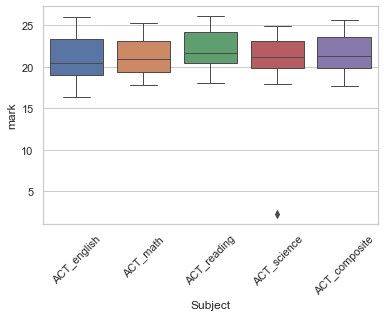

In [79]:
sns.set(style="whitegrid")
palette="Set3"
plt.xticks(rotation=45)
# ax = sns.boxplot(x='Subject', y='mark', data = Marks_ACT, linewidth=1,hue="Subject")
ax = sns.boxplot(x='Subject', y='mark', data = Marks_ACT, linewidth=1)
# ax = sns.swarmplot(x="Subject", y="mark", data= Marks, color=".25")


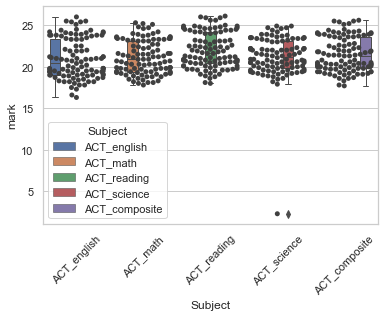

In [80]:
sns.set(style="whitegrid")
palette="Set3"
plt.xticks(rotation=45)
ax = sns.boxplot(x='Subject', y='mark', data = Marks_ACT, linewidth=1,hue="Subject")
ax = sns.swarmplot(x="Subject", y="mark", data= Marks_ACT, color=".25")

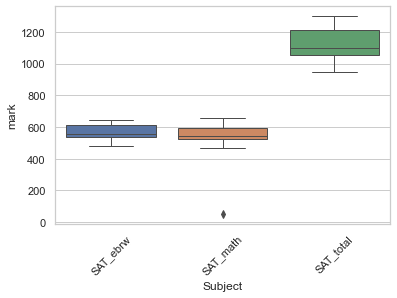

In [81]:
sns.set(style="whitegrid")
palette="Set3"
plt.xticks(rotation=45)
# ax = sns.boxplot(x='Subject', y='mark', data = Marks_ACT, linewidth=1,hue="Subject")
ax = sns.boxplot(x='Subject', y='mark', data = Marks_SAT, linewidth=1)
# ax = sns.swarmplot(x="Subject", y="mark", data= Marks, color=".25")


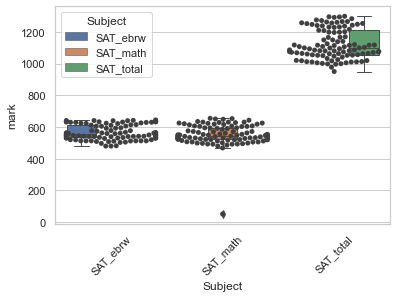

In [82]:
sns.set(style="whitegrid")
palette="Set3"
plt.xticks(rotation=45)
ax = sns.boxplot(x='Subject', y='mark', data = Marks_SAT, linewidth=1,hue="Subject")
ax = sns.swarmplot(x="Subject", y="mark", data= Marks_SAT, color=".25")

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

In [83]:
final_v.head(1)

,act_part,act_english,act_math,act_reading,act_science,act_composite,sat_part,sat_ebrw,sat_math,sat_total
state,,,,,,,,,,
Alabama,100.0,18.9,18.4,19.7,19.4,19.2,5.0,593.0,572.0,1165.0


<Figure size 576x360 with 0 Axes>

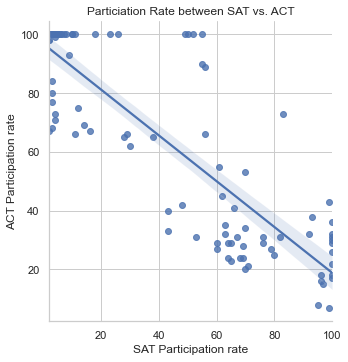

In [84]:
# Particiation Rate between SAT vs. ACT
subplot_lmplot(final_v, 'sat_part','act_part', 
                    'SAT Participation rate', 'ACT Participation rate', 
                    'Particiation Rate between SAT vs. ACT')

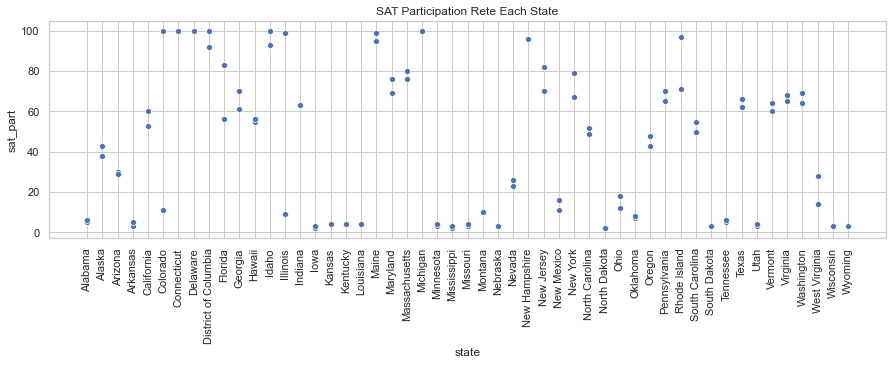

In [85]:
# sns.scatterplot(final.state, final.sat_part)
# plt.xticks( rotation= 60 )
# plt.title('SAT Participation Rete Each State');

df_final_NI = pd.read_csv('../data/final_v.csv') # 
df_final_NI.head()
df_final_NI.name ="state"
#df_final_NI.reset_index(inplace=True)`

# df_final_NI.head()
plt.figure(figsize=(15,4))
sns.scatterplot(df_final_NI.state, df_final_NI.sat_part)
plt.xticks( rotation= 90 )
plt.title('SAT Participation Rete Each State');

In [86]:
df_final_NI.head()

,state,act_part,act_english,act_math,act_reading,act_science,act_composite,sat_part,sat_ebrw,sat_math,sat_total
0,Alabama,100.0,18.9,18.4,19.7,19.4,19.2,5.0,593.0,572.0,1165.0
1,Alaska,65.0,18.7,19.8,20.4,19.9,19.8,38.0,547.0,533.0,1080.0
2,Arizona,62.0,18.6,19.8,20.1,19.8,19.7,30.0,563.0,553.0,1116.0
3,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4,3.0,614.0,594.0,1208.0
4,California,31.0,22.5,22.7,23.1,22.2,22.8,53.0,531.0,524.0,1055.0


In [87]:
# final['sat_part_18'] # Alabama 6, Alaska 43
final['sat_part_17'] # Alabama 6, Alaska 43

state
Alabama                   5.0
Alaska                   38.0
Arizona                  30.0
Arkansas                  3.0
California               53.0
Colorado                 11.0
Connecticut             100.0
Delaware                100.0
District of Columbia    100.0
Florida                  83.0
Georgia                  61.0
Hawaii                   55.0
Idaho                    93.0
Illinois                  9.0
Indiana                  63.0
Iowa                      2.0
Kansas                    4.0
Kentucky                  4.0
Louisiana                 4.0
Maine                    95.0
Maryland                 69.0
Massachusetts            76.0
Michigan                100.0
Minnesota                 3.0
Mississippi               2.0
Missouri                  3.0
Montana                  10.0
Nebraska                  3.0
Nevada                   26.0
New Hampshire            96.0
New Jersey               70.0
New Mexico               11.0
New York                 67.0
Nort

In [88]:
final.head()
Different = final['sat_part_18']-final['sat_part_17']

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

In [89]:
round(final_v.describe(),1)

,act_part,act_english,act_math,act_reading,act_science,act_composite,sat_part,sat_ebrw,sat_math,sat_total
count,102.0,102.0,102.0,102.0,102.0,102.0,102.0,102.0,102.0,102.0
mean,63.5,21.0,21.2,22.0,21.2,21.5,42.8,566.4,551.9,1123.1
std,33.0,2.4,2.0,2.1,2.6,2.1,36.3,46.4,68.7,92.9
min,7.0,16.3,17.8,18.0,2.3,17.7,2.0,480.0,52.0,950.0
25%,31.0,19.0,19.4,20.4,19.9,19.8,4.0,534.2,522.2,1055.2
50%,66.5,20.5,20.9,21.6,21.2,21.4,45.5,554.5,545.5,1099.0
75%,100.0,23.4,23.1,24.2,23.1,23.6,70.0,613.5,595.0,1209.5
max,100.0,26.0,25.3,26.1,24.9,25.6,100.0,644.0,655.0,1298.0


Answers:


#### Distributions in the data

In this dataset, each data represents a sample from a population.                        
For example, for ACT math test:
- Population: the test results of all the students who take this test, nation-wide.
- Population mean: is the national average of ACT math test (total scores/total no. of test takers) 
- Sample: the state means of ACT math test. We have 51 samples (51 states)

***According to CLT, we generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?***

Answer:

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Text(0.5, 1.0, 'SAT 17/18 Participation Distribution in %')

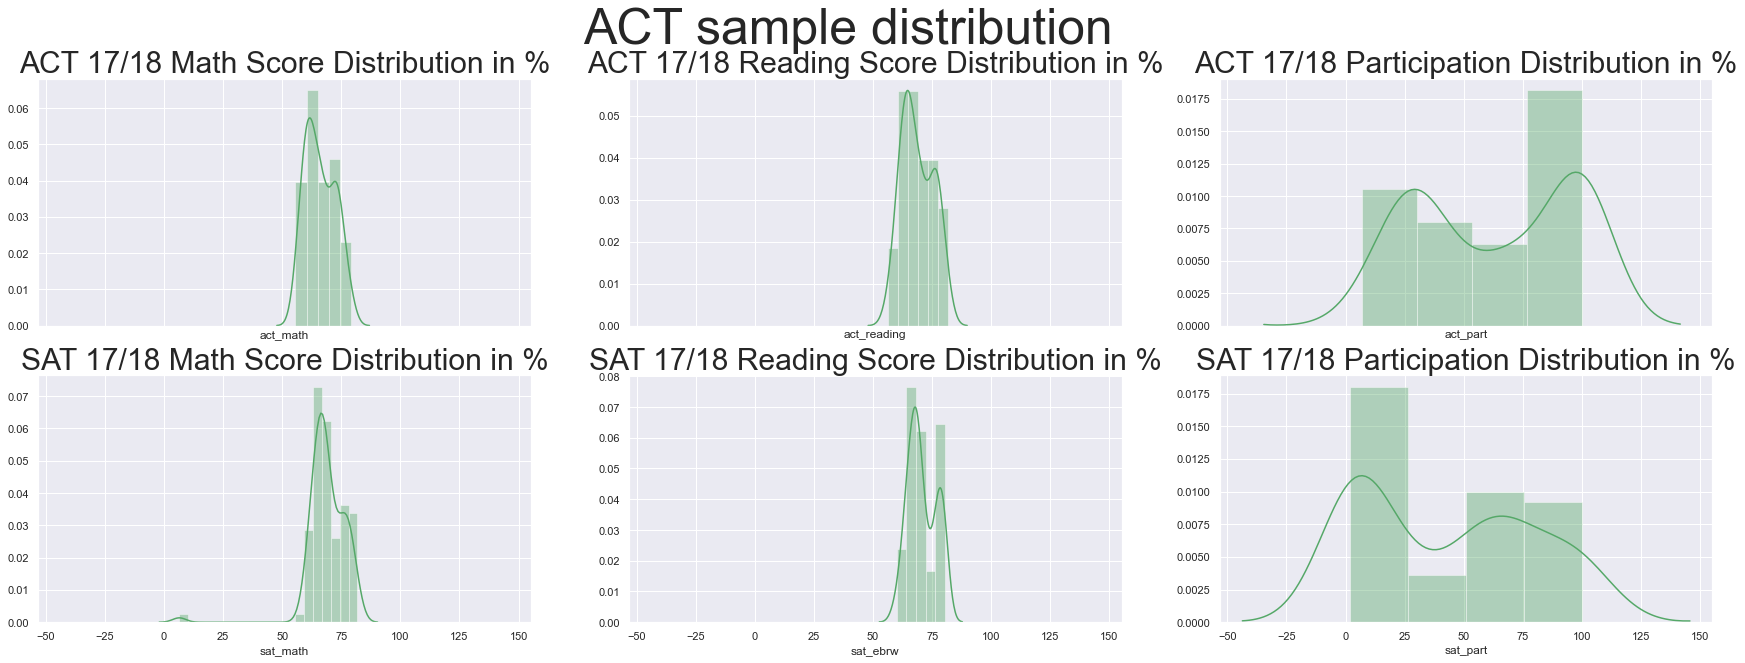

In [90]:
sns.set(style="darkgrid", palette="coolwarm_r", color_codes=True)
fig, axes = plt.subplots(2, 3, sharex=True, figsize=(30,10))
fig.suptitle('ACT sample distribution', fontsize=50)
plot1 = (final_v['act_math']/32)*100
plot2 = (final_v['act_reading']/32)*100
plot3 = final_v['act_part']
plot4 = (final_v['sat_math']/800)*100
plot5 = (final_v['sat_ebrw']/800)*100
plot6 = final_v['sat_part']
sns.distplot(plot1, kde=True, color="g", ax=axes[0,0])
sns.distplot(plot2, kde=True, color="g", ax=axes[0,1])
sns.distplot(plot3, kde=True, color="g", ax=axes[0,2])
sns.distplot(plot4, kde=True, color="g", ax=axes[1,0])
sns.distplot(plot5, kde=True, color="g", ax=axes[1,1])
sns.distplot(plot6, kde=True, color="g", ax=axes[1,2])
fz = 30
axes[0,0].set_title('ACT 17/18 Math Score Distribution in %', fontsize=fz)
axes[0,1].set_title('ACT 17/18 Reading Score Distribution in %', fontsize=fz)
axes[0,2].set_title('ACT 17/18 Participation Distribution in %', fontsize=fz)
axes[1,0].set_title('SAT 17/18 Math Score Distribution in %', fontsize=fz)
axes[1,1].set_title('SAT 17/18 Reading Score Distribution in %', fontsize=fz)
axes[1,2].set_title('SAT 17/18 Participation Distribution in %', fontsize=fz)

<span style='color:green'>**Answer:** </span>
<span style='color:green'>From the graph observed for 102 samples each for two years, the distribution shown quite normally distributed except participation. For scores related, if we are able to construct using all scores instaed of mean of each state, a more "normal distributed" pattern should be observed. Similary for the participation, if we are able to obtain a smaller zone instead of at state level, a normal distributed pattern should be obtained. Bigger pool of samples will be the key on obtaining the normally distributed pattern.</span>

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

<span style='color:green'>**Answer:** </span>
- <span style='color:green'>Yes, since we only have a sample of two years, we should be able to perform the statistical inferencing. </span>
- <span style='color:green'>There are some convolution on the data as people who took both SAT and ACT test. </span>

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

##### Is it appropriate to compare *these* specific SAT and ACT math scores  - can we say students with higher SAT math score is better than those with lower ACT math score, or vice versa?

Why or why not? 

<span style='color:green'> **Answer:** </span>
<span style='color:green'> In principle, both SAT and ACT should provide a similar assessment on the competency, therefore, there should be no different between SAT or ACT math score assesment. </span> 
<span style='color:green'>Theoritically, both SAT and ACT generally cover the same topics, both ACT and SAT scores are used for college admissions decisions and awarding merit-based scholarships.</span> <span style='color:green'>The null hypothesis is the "status quo" hypothesis that you wish to prove wrong. We typically denote the null hypothesis with  𝐻0 .</span>

<span style='color:green'> However, we can perform a hypothesis test the subject Math to evaluate this.</span>

> <span style='color:green'> $H_0:$ There is NO difference in evaluating college student competency using both test</span>

> <span style='color:green'> $H_A:$ There is difference in evaluating college student competency using both test</span>

<span style='color:green'>**First group of tests, is to ensure there is no different within SAT or ACT**</span>
- <span style='color:green'> Test 1.1 :No different ACT 17 vs ACT 18 </span>
- <span style='color:green'> Test 1.2 :No different SAT 17 vs SAT 18 </span>


<span style='color:green'>**Second group of test, is to ensure there is no different between SAT or ACT**</span>
- <span style='color:green'> Test 2.1 :No different ACT 17 vs SAT 17 </span>
- <span style='color:green'> Test 2.2 :No different ACT 18 vs SAT 18 </span>
- <span style='color:green'> Test 2.3 :No different ACT 17 vs SAT 18 </span>
- <span style='color:green'> Test 2.4 :No different ACT 17/18 vs SAT 17/18 </span>

<span style='color:green'>**Group 1 Tests** </span>

In [91]:
Score_A = (final['act_math_17'])
Score_B = (final['act_math_18'])
t_stat, p_value = stats.ttest_ind(Score_A, Score_B, equal_var=False)
print("ACT 17 vs ACT 18 Math P-Value is {}%".format(round(p_value*100,2)))

Score_A = (final['sat_math_17'])
Score_B = (final['sat_math_18'])
t_stat, p_value = stats.ttest_ind(Score_A, Score_B, equal_var=False)
print("SAT 17 vs SAT 18 Math P-Value is {}%".format(round(p_value*100,2)))

ACT 17 vs ACT 18 Math P-Value is 88.66%
SAT 17 vs SAT 18 Math P-Value is 52.99%


<span style='color:green'>From the above, we can observed that there is no significant within the similar tests</span>

<span style='color:green'>**Group 2 Tests** </span>

In [92]:
Score_A = (final['act_math_17']/32)*100
Score_B = (final['sat_math_17']/800)*100
t_stat, p_value = stats.ttest_ind(Score_A, Score_B, equal_var=False)
print("ACT 17 vs SAT 17 Math P-Value is {}%".format(round(p_value*100,4)))
Score_A = (final['act_math_18']/32)*100
Score_B = (final['sat_math_18']/800)*100
t_stat, p_value = stats.ttest_ind(Score_A, Score_B, equal_var=False)
print("ACT 18 vs SAT 18 Math P-Value is {}%".format(round(p_value*100,4)))
Score_A = (final['act_math_17']/32)*100
Score_B = (final['sat_math_18']/800)*100
t_stat, p_value = stats.ttest_ind(Score_A, Score_B, equal_var=False)
print("ACT 17 vs SAT 18 Math P-Value is {}%".format(round(p_value*100,4)))
Score_A = (final_v['act_math']/32)*100
Score_B = (final_v['sat_math']/800)*100
t_stat, p_value = stats.ttest_ind(Score_A, Score_B, equal_var=False)
print("ACT 17/18 vs SAT 18/18 Math P-Value is {}%".format(round(p_value*100,4)))

ACT 17 vs SAT 17 Math P-Value is 19.3064%
ACT 18 vs SAT 18 Math P-Value is 0.4945%
ACT 17 vs SAT 18 Math P-Value is 0.6726%
ACT 17/18 vs SAT 18/18 Math P-Value is 0.666%


<span style='color:green'> **Answer:** </span>
<span style='color:green'> From the above tests, it suggest that there is a different between ACT and SAT after the introduction of SAT 18 into the scenario </span>

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

- [Ref1: SAT / ACT Prep Online Guides and Tips](https://blog.prepscholar.com/average-sat-scores-by-state-most-recent)
- [Ref2: SAT reclaims title of most widely used college admission test](https://www.washingtonpost.com/education/2018/10/23/sat-reclaims-title-most-widely-used-college-admission-test/)
- [Ref3: Correlation between higher SAT scores and lower average student debt](https://www.nitrocollege.com/research/student-debt-future-earnings)
- [Ref4: Student Debt and future earning](https://www.nitrocollege.com/research/student-debt-future-earnings)

<span style='color:green'> **Answer:** </span>
<span style='color:green'> According to the web as shown in above the link, there are multiple research on providing different view on SAT and ACT. The data show a correlation between higher SAT scores and lower average student debt{Ref 4}. More time will be needed to perform data collection and cleaning in order to perform the necessary analysis. </span>

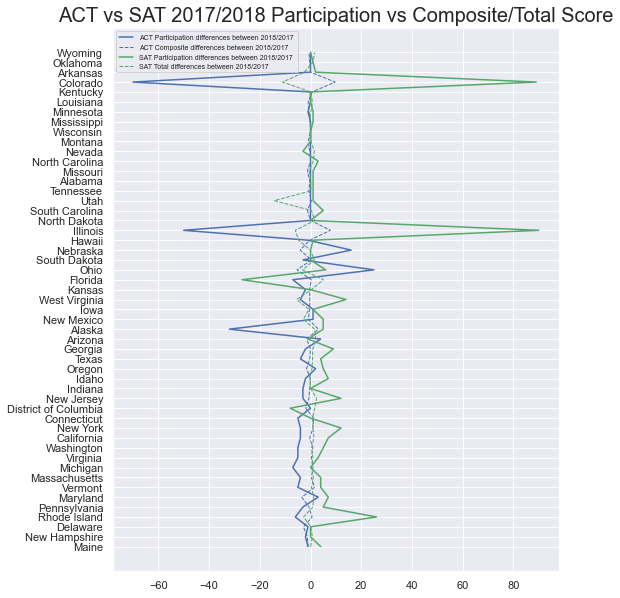

In [93]:
ACT_SAT = final[['act_part_17','act_part_18', 'sat_part_17','sat_part_18',
                 'act_composite_17','act_composite_18','sat_total_17','sat_total_18']
               ].sort_values(by = ['act_part_17'], ascending=True)
ACT_SAT.reset_index(inplace=True)
ACT_SAT['act_part_delta'] = ACT_SAT['act_part_18'] - ACT_SAT['act_part_17']
ACT_SAT['sat_part_delta'] = ACT_SAT['sat_part_18'] - ACT_SAT['sat_part_17']
ACT_SAT['act_composite_17'] = round((ACT_SAT['act_composite_17']/32)*100,2)
ACT_SAT['act_composite_18'] = round((ACT_SAT['act_composite_18']/32)*100,2)
ACT_SAT['sat_total_17'] = round((ACT_SAT['sat_total_17']/1600)*100,2)
ACT_SAT['sat_total_18'] = round((ACT_SAT['sat_total_18']/1600)*100,2)
ACT_SAT['act_composite_delta'] = ACT_SAT['act_composite_18'] - ACT_SAT['act_composite_17']
ACT_SAT['sat_total_delta'] = ACT_SAT['sat_total_18'] - ACT_SAT['sat_total_17']
ACT_SAT[['act_part_delta','sat_part_delta','act_composite_delta','sat_total_delta']]

plt.figure(figsize=(8,10))
plt.style.use('seaborn-bright')

y11 = ACT_SAT['state']
x11 = ACT_SAT['act_part_delta']
plt.plot(x11, y11, label = "ACT Participation differences between 2018/2017 ",linestyle='-', color='b',lw=1.5)
y12 = ACT_SAT['state']
x12 = ACT_SAT['act_composite_delta']
plt.plot(x12, y12, label = "ACT Composite differences between 2018/2017 ", linestyle='--',color='b',lw=1)


y21 = ACT_SAT['state']
x21 = ACT_SAT['sat_part_delta']
plt.plot(x21, y21, label = "SAT Participation differences between 2018/2017",linestyle='-',color='g',lw=1.5)
y22 = ACT_SAT['state']
x22 = ACT_SAT['sat_total_delta']
plt.plot(x22, y22, label = "SAT Total differences between 2018/2017 ", linestyle='--',color='g',lw=1)

plt.title('ACT vs SAT 2017/2018 Participation vs Composite/Total Score', fontsize=20)
# plt.axvline(25, linestyle='--', lw = 1, color="r", label= "25%")
# plt.axvline(75, linestyle='--', lw = 1, color="r", label= "75%")
# plt.axvline(50, linestyle='-', lw = 1, color="r", label= "50%")
plt.legend(loc='upper left',prop={'size': 7})
plt.rc('xtick',labelsize=9)
plt.rc('ytick',labelsize=9)
plt.show()


<span style='color:green'> **Answer:** </span>
<span style='color:green'> From the above diagram, it seems like SAT is gaining more participation than ACT. Furthermore, the results and participation on both ACT and SAT is inversely related to each other. We could also observed few states with swing of participation corresponding with the relevant score swing as well (Illinois, Colorado...etc.)</span>

In [94]:
ACT_LowestParticipation = final[['act_part_17','act_part_18','act_math_17',
                                 'act_math_18','act_reading_17','act_reading_18',
                                 'act_composite_17','act_composite_18']
                               ].sort_values(by = ['act_part_17','act_part_18'], ascending=True)
ACT_LowestParticipation.reset_index(inplace=True)
ACT_LowestParticipation['act_composite_17'] = round((ACT_LowestParticipation['act_composite_17']/32)*100,2)
ACT_LowestParticipation['act_composite_18'] = round((ACT_LowestParticipation['act_composite_18']/32)*100,2)
ACT_LowestParticipation['act_math_17'] = round((ACT_LowestParticipation['act_math_17']/32)*100,2)
ACT_LowestParticipation['act_math_18'] = round((ACT_LowestParticipation['act_math_18']/32)*100,2)
ACT_LowestParticipation['act_reading_17'] = round((ACT_LowestParticipation['act_reading_17']/32)*100,2)
ACT_LowestParticipation['act_reading_18'] = round((ACT_LowestParticipation['act_reading_18']/32)*100,2)

In [95]:
SAT_LowestParticipation = final[['sat_part_17','sat_ebrw_17','sat_math_17',
                                 'sat_total_17','sat_part_18','sat_ebrw_18',
                                 'sat_math_18','sat_total_18']
                               ].sort_values(by = ['sat_part_17','sat_part_18'], ascending=True)
SAT_LowestParticipation.reset_index(inplace=True)
SAT_LowestParticipation['sat_total_17'] = round((SAT_LowestParticipation['sat_total_17']/1600)*100,2)
SAT_LowestParticipation['sat_total_18'] = round((SAT_LowestParticipation['sat_total_18']/1600)*100,2)
SAT_LowestParticipation['sat_ebrw_17'] = round((SAT_LowestParticipation['sat_ebrw_17']/800)*100,2)
SAT_LowestParticipation['sat_ebrw_18'] = round((SAT_LowestParticipation['sat_ebrw_18']/800)*100,2)
SAT_LowestParticipation['sat_math_17'] = round((SAT_LowestParticipation['sat_math_17']/800)*100,2)
SAT_LowestParticipation['sat_math_18'] = round((SAT_LowestParticipation['sat_math_17']/800)*100,2)

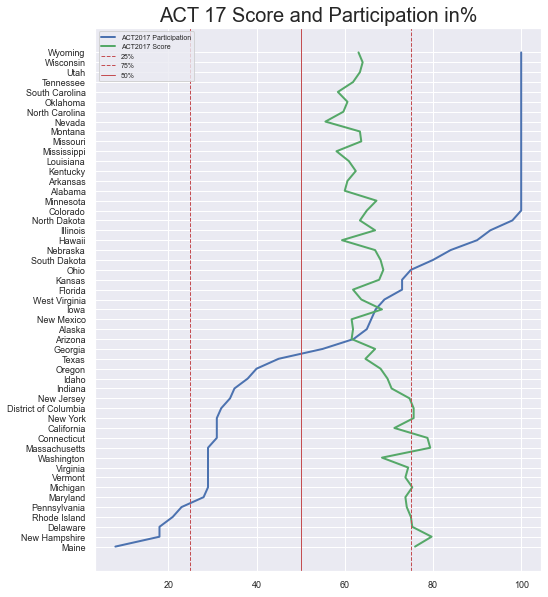

In [96]:
y1 = ACT_LowestParticipation['state']
x1 = ACT_LowestParticipation['act_part_17']
plt.figure(figsize=(8,10))
# plt.xticks( rotation= 90 )
plt.style.use('seaborn-bright')
plt.plot(x1, y1, label = "ACT2017 Participation", color='b',lw=2)

y11 = ACT_LowestParticipation['state']
x11 = ACT_LowestParticipation['act_composite_17']
plt.plot(x11, y11, label = "ACT2017 Score", color='g',lw=2)
plt.title('ACT 17 Score and Participation in%', fontsize=20)
plt.axvline(25, linestyle='--', lw = 1, color="r", label= "25%")
plt.axvline(75, linestyle='--', lw = 1, color="r", label= "75%")
plt.axvline(50, linestyle='-', lw = 1, color="r", label= "50%")
plt.legend(loc='upper left',prop={'size': 7})
plt.rc('xtick',labelsize=7)
plt.rc('ytick',labelsize=7)
plt.show()

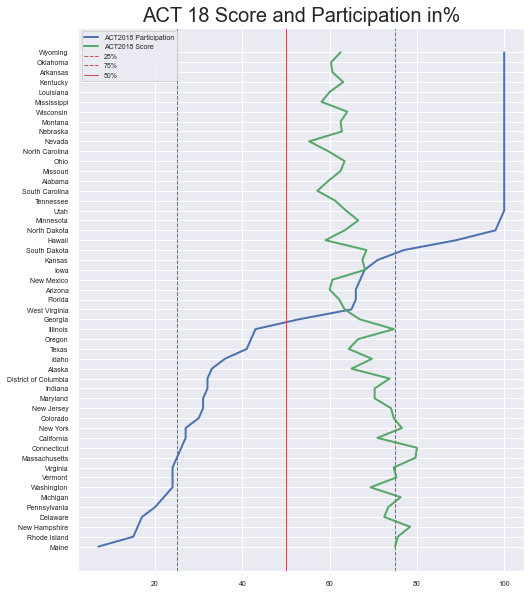

In [97]:
ACT_LowestParticipation = final[['act_part_18','act_composite_18']
                               ].sort_values(by = ['act_part_18'], ascending=True)
ACT_LowestParticipation.reset_index(inplace=True)
ACT_LowestParticipation['act_composite_18'] = round((ACT_LowestParticipation['act_composite_18']/32)*100,2)

y1 = ACT_LowestParticipation['state']
x1 = ACT_LowestParticipation['act_part_18']
plt.figure(figsize=(8,10))
# plt.xticks( rotation= 90 )
plt.style.use('seaborn-bright')
plt.plot(x1, y1, label = "ACT2018 Participation", color='b',lw=2)

y11 = ACT_LowestParticipation['state']
x11 = ACT_LowestParticipation['act_composite_18']
plt.plot(x11, y11, label = "ACT2018 Score", color='g',lw=2)
plt.title('ACT 18 Score and Participation in%', fontsize=20)
plt.axvline(25, linestyle='--', lw = 1, color="r", label= "25%")
plt.axvline(75, linestyle='--', lw = 1, color="r", label= "75%")
plt.axvline(50, linestyle='-', lw = 1, color="r", label= "50%")
plt.legend(loc='upper left',prop={'size': 7})
plt.rc('xtick',labelsize=7)
plt.rc('ytick',labelsize=7)
plt.show()

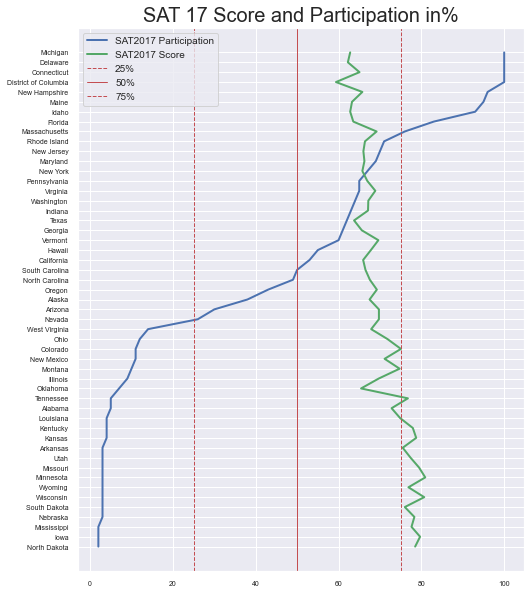

In [98]:
plt.figure(figsize=(8,10))
y2 = SAT_LowestParticipation['state']
x2 = SAT_LowestParticipation['sat_part_17']
plt.plot(x2, y2, label = "SAT2017 Participation", color='b',lw=2)

y21 = SAT_LowestParticipation['state']
x21 = SAT_LowestParticipation['sat_total_17']
plt.plot(x21, y21, label = "SAT2017 Score", color='g',lw=2)
plt.title('SAT 17 Score and Participation in%', fontsize=20)
plt.axvline(25, linestyle='--', lw = 1, color="r", label= "25%")
plt.axvline(50, linestyle='-', lw = 1, color="r", label= "50%")
plt.axvline(75, linestyle='--', lw = 1, color="r", label= "75%")
plt.legend(loc='upper left',prop={'size': 10})
plt.rc('xtick',labelsize=9)
plt.rc('ytick',labelsize=9)
plt.show()

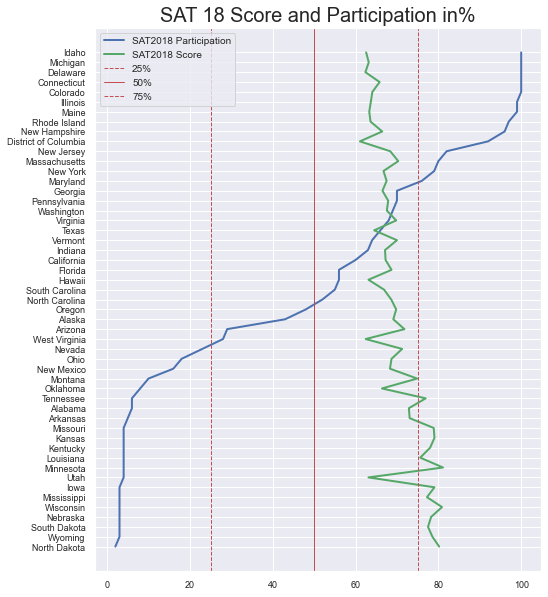

In [99]:
SAT_LowestParticipation = final[['sat_part_18','sat_total_18']
                               ].sort_values(by = ['sat_part_18'], ascending=True)
SAT_LowestParticipation.reset_index(inplace=True)
SAT_LowestParticipation['sat_total_18'] = round((SAT_LowestParticipation['sat_total_18']/1600)*100,2)

plt.figure(figsize=(8,10))
y2 = SAT_LowestParticipation['state']
x2 = SAT_LowestParticipation['sat_part_18']
plt.plot(x2, y2, label = "SAT2018 Participation", color='b',lw=2)

y21 = SAT_LowestParticipation['state']
x21 = SAT_LowestParticipation['sat_total_18']
plt.plot(x21, y21, label = "SAT2018 Score", color='g',lw=2)
plt.title('SAT 18 Score and Participation in%', fontsize=20)
plt.axvline(25, linestyle='--', lw = 1, color="r", label= "25%")
plt.axvline(50, linestyle='-', lw = 1, color="r", label= "50%")
plt.axvline(75, linestyle='--', lw = 1, color="r", label= "75%")
plt.legend(loc='upper left',prop={'size': 10})
plt.rc('xtick',labelsize=9)
plt.rc('ytick',labelsize=9)
plt.show()

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

<span style='color:green'>**Key Take away**</span>
<span style='color:green'>Preliminary analysis can conclude the following:</span>
><span style='color:green'>The ACT and SAT participation seems like inversely correlated with each others, with states that to profer one test than other. ACT seems like is having more 100 % committed states than SAT, this suggestted that ACT is much more popular than SAT.</span>

><span style='color:green'> With reference to the last few diagram, ACT and SAT scores are inversely correlated with their participation rates. Those state with lower participation tend to achieving higher score and vice versa. 

><span style='color:green'>The hypothesis test on SAT & ACT also suggested both tests are different. The tests suggest that there is a different between ACT and SAT after the introduction of SAT 18 into the scenario </span>
    
><span style='color:green'>More data sets will need to be introduced in oder to have a more comprehensive and in depth conclusion on both SAT and ACT. Theses data sets should include (but not limited) race, gendar, school acceptance level (in quantity) on both ACT and SAT. </span>
